In [ ]:
import numpy as np
import pandas as pd
import os 
import pickle


In [ ]:
#run classification model on the images
##CNN based classifier
import keras 
from keras.models import Sequential
from keras.layers import Softmax
from keras.datasets import cifar10

Using TensorFlow backend.


In [ ]:
(train_images,train_label),(test_images,test_label)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print(train_images.shape)
print(train_label.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
from keras.utils.np_utils import to_categorical  
train_labels=to_categorical(train_label,num_classes=10)
test_labels=to_categorical(test_label, num_classes=10)


In [ ]:
print(train_labels)
print(train_labels.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(50000, 10)


In [ ]:
### adding gaussian noise
import numpy as np
image_shape=(32,32,3)
mu=0
sigma=0.5
noise_factor=1.5


gauss=np.random.normal(mu,sigma,image_shape)
image=train_images[0]+gauss
print(image.shape)


(32, 32, 3)


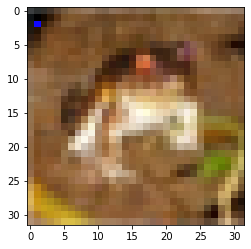

In [ ]:
import cv2
from matplotlib import pyplot as plt

plt.imshow(image.astype('uint8'))
plt.show()


In [ ]:
def get_denoised_images():
  train_images_denoised=[]
  B=[]

  for i in range(len(train_images_noisy)):
      my_img=train_images_noisy[i]
      X=cv2.GaussianBlur(my_img,(5,5),cv2.BORDER_DEFAULT)
      B.append(X)
    
  A=np.array(B)   
  Y=denoiser_model.predict(A)
  train_images_denoised=np.array(Y)
  print(train_images_denoised.shape)


  test_images_denoised=[]
  B=[]

  for i in range(len(test_images_noisy)):
      my_img=test_images_noisy[i]
    
      X=cv2.GaussianBlur(my_img,(5,5),cv2.BORDER_DEFAULT)
      B.append(X)
    
  A=np.array(B)   
  Y=denoiser_model.predict(A)
  test_images_denoised=np.array(B)
  print(test_images_denoised.shape)
  return train_images_denoised, test_images_denoised

In [ ]:
#function to add noise
def add_gauss(img):
    return img+1.5*np.random.normal(0,0.1,(32,32,3))


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Conv1D, Conv3D, Input, Activation, Subtract
import tensorflow
from tensorflow.keras import Model


In [ ]:
train_images_noisy=[]
train_flattened=[]

for i in range(len(train_images)):
    train_images_noisy.append(add_gauss(train_images[i]))
print(len(train_images_noisy))

test_images_noisy=[]
for i in range(len(test_images)):
    test_images_noisy.append(add_gauss(test_images[i]))
    
    

50000


In [ ]:
def cnn_denoiser():
  dilation=[2,3,4,3,2,1,1]
  input_image= Input(shape=(32,32,3))
  x= Conv2D(64,kernel_size=3,activation="relu",dilation_rate=1,strides=(1,1),padding="same")(input_image)
  
  for layers in range(5):
    x=Conv2D(64,kernel_size=3, strides=(1,1),dilation_rate=dilation[layers],padding="same")(x)
    x= BatchNormalization(axis=-1,epsilon=0.001 )(x)
    x=Activation("relu")(x)

  x=Conv2D(1, kernel_size=3,strides=(1,1),dilation_rate=1,padding="same")(x)
  x=Subtract()([input_image,x])
  model=Model(inputs=input_image, outputs=x)
  model.compile(optimizer="Adam", loss=["mean_squared_logarithmic_error"])
  #model.compile(optimizer="Adam", loss=["mse"])
  
  A=np.array(train_images_noisy)
  B=np.array(train_images)
  model.fit(A,B,epochs=2)
  return model


In [ ]:
denoiser_model=cnn_denoiser()

Epoch 1/2
1563/1563 [==============================] - 25s 16ms/step - loss: 6.6998e-05
Epoch 2/2
1563/1563 [==============================] - 25s 16ms/step - loss: 4.9873e-05


In [ ]:
print(denoiser_model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d_2[0][0]                   
______________________________________________________________________________________________

In [ ]:
##classification model for noisy images
from tensorflow.keras.callbacks import EarlyStopping
early_stop=[EarlyStopping(patience=2)]
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(128, kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

train_images_noisy=np.array(train_images_noisy)
test_images_noisy=np.array(test_images_noisy)

model.fit(train_images,train_labels,validation_data=(test_images_noisy,test_labels),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.6458 - accuracy: 0.2981 - val_loss: 1.8745 - val_accuracy: 0.3461
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5687 - accuracy: 0.4488 - val_loss: 1.5711 - val_accuracy: 0.4425
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2702 - accuracy: 0.5575 - val_loss: 1.4803 - val_accuracy: 0.4959
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0435 - accuracy: 0.6400 - val_loss: 1.6884 - val_accuracy: 0.4560
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8240 - accuracy: 0.7190 - val_loss: 1.8843 - val_accuracy: 0.4982
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6378 - accuracy: 0.7836 - val_loss: 2.2806 - val_accuracy: 0.4751
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5005 - accuracy: 0.8350 - val_loss: 2.7138 - val_accuracy:

In [ ]:
print(len(train_images_noisy))

In [ ]:
train_images_denoised,test_images_denoised=get_denoised_images()

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
()

(10000, 32, 32, 3)


In [ ]:
##classification model for denoised images
model_denoised=Sequential()
model_denoised.add(Conv2D(32,kernel_size=3,activation='relu', input_shape=(32,32,3)))
model_denoised.add(Conv2D(128, kernel_size=3,activation='relu'))
model_denoised.add(Flatten())
model_denoised.add(Dense(10,activation='softmax'))

model_denoised.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model_denoised.fit(train_images,train_labels,validation_data=(test_images_denoised,test_labels),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 4.0368 - accuracy: 0.2989 - val_loss: 2.1531 - val_accuracy: 0.2177
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5020 - accuracy: 0.4763 - val_loss: 2.0474 - val_accuracy: 0.2852
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1455 - accuracy: 0.6059 - val_loss: 2.1133 - val_accuracy: 0.2664
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8780 - accuracy: 0.7004 - val_loss: 2.1244 - val_accuracy: 0.2809
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6815 - accuracy: 0.7670 - val_loss: 2.1595 - val_accuracy: 0.2491
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5406 - accuracy: 0.8192 - val_loss: 2.2448 - val_accuracy: 0.2644
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4419 - accuracy: 0.8555 - val_loss: 2.2478 - val_accuracy:

In [ ]:
from math import log10, sqrt 
import cv2 
import numpy as np 
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

In [ ]:
print(PSNR(test_images_noisy,test_images_denoised))

21.35195012629767
